In [ ]:
%pip install wbdata
%pip install pandas
%pip install iso3166
%pip install cufflinks
%pip install eep153_tools
%pip install plotly
%pip install kagglehub
%pip install os
import wbdata
import pandas as pd
import geopandas as gpd
import math
import iso3166
import plotly.offline as py
from scipy.optimize import newton
import plotly.graph_objs as go
import numpy as np
import cufflinks as cf
from matplotlib import animation as ani
import matplotlib.pyplot as plt
import kagglehub
import os
cf.go_offline()

In [9]:
# Load the dataset
file_path = "south-america_652.geojson"
southamerica = gpd.read_file(file_path)
# Looking at dataset
southamerica

ERROR 1: PROJ: proj_create_from_database: Open of /srv/conda/share/proj failed


,name,cartodb_id,created_at,updated_at,geometry
0,French Guiana (France),1,2013-11-28 06:32:17+01:00,2013-11-28 06:33:02+01:00,"POLYGON ((-52.28892 4.87612, -52.32461 4.7709,..."
1,Brazil,33,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-48.48589 -27.76699, -48.55459..."
2,Chile,41,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-67.5752 -55.88965, -67.61143 ..."
3,Argentina,9,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
4,Bolivia,32,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-58.15977 -20.16465, -58.13994 -19.9..."
5,Colombia,48,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-78.11372 2.54175, -78.14082 2..."
6,Ecuador,64,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-80.13159 -2.97314, -80.15068 ..."
7,Guyana,90,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-57.19478 5.54844, -57.2479 5.48525,..."
8,Peru,171,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-69.96592 -4.23594, -69.97202 -4.301..."
9,Paraguay,179,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-58.15977 -20.16465, -58.13779 -20.2..."


<Axes: >

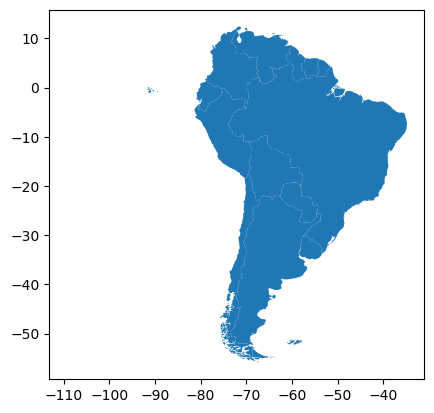

In [10]:
#Plotting Dataset
southamerica.plot()

In [11]:
#Filtering Dataset
df = southamerica
filtered_df = df[df['name'].isin(["Brazil", "Peru", "Ecuador", "Bolivia"])]
filtered_df = filtered_df.rename(columns={"name": "Country"})
print(filtered_df)

   Country  cartodb_id                created_at                updated_at  \
1   Brazil          33 2013-11-27 20:16:22+01:00 2013-11-27 20:16:23+01:00   
4  Bolivia          32 2013-11-27 20:16:22+01:00 2013-11-27 20:16:23+01:00   
6  Ecuador          64 2013-11-27 20:16:22+01:00 2013-11-27 20:16:23+01:00   
8     Peru         171 2013-11-27 20:16:22+01:00 2013-11-27 20:16:23+01:00   

                                            geometry  
1  MULTIPOLYGON (((-48.48589 -27.76699, -48.55459...  
4  POLYGON ((-58.15977 -20.16465, -58.13994 -19.9...  
6  MULTIPOLYGON (((-80.13159 -2.97314, -80.15068 ...  
8  POLYGON ((-69.96592 -4.23594, -69.97202 -4.301...  


In [12]:
#Loading Dataset
path = kagglehub.dataset_download("nelgiriyewithana/countries-of-the-world-2023")

files = os.listdir(path)
print("Files in dataset:", files)

file_name = [f for f in files if f.endswith(".csv")][0]
file_path = os.path.join(path, file_name)

# Looking at dataset
population = pd.read_csv(file_path)
population

Files in dataset: ['world-data-2023.csv']


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


Text(0.5, 1.0, 'Density of Peru, Ecuador, Brazil, and Bolivia in 2023')

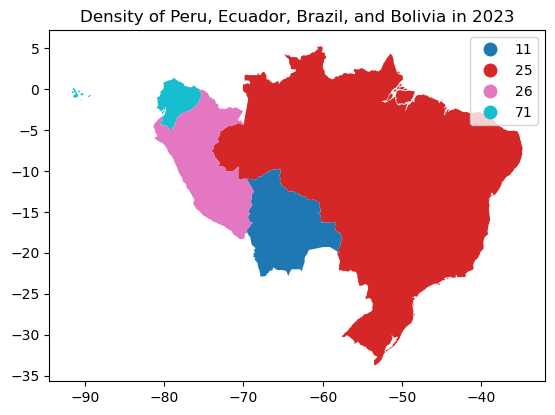

In [13]:
# Merging two datasets
merged_df = filtered_df.merge(population, on = "Country")
merged_df.plot(column = "Density\n(P/Km2)", legend = "true")
plt.title("Density of Peru, Ecuador, Brazil, and Bolivia in 2023") 

In [14]:
# Load the dataset
file_path = "population.csv"
southamericapast = pd.read_csv(file_path)

# Renaming Column 
southamericapast = southamericapast.rename(columns={"Country Name": "Country"})

# Filter for Peru, Bolivia, Brazil, and Ecuador for Year 1960
filtered_southamerica1960 = southamericapast[
    (southamericapast["Country"].isin(["Peru", "Bolivia", "Brazil", "Ecuador"])) &
    (southamericapast["Year"] == 1960)]

# Input Land Size for each country to find density
filtered_southamerica1960["Land Size (km²)"] = [1098581, 8514215, 283561, 1285220]

#Create a new column for density by dividing population by land size
filtered_southamerica1960["Density (P/Km^2)"] = filtered_southamerica1960["Value"] / filtered_southamerica1960["Land Size (km²)"]
filtered_southamerica1960

,Country,Country Code,Year,Value,Land Size (km²),Density (P/Km^2)
1792,Bolivia,BOL,1960,3702323.0,1098581,3.370096
1856,Brazil,BRA,1960,72388126.0,8514215,8.502032
4224,Ecuador,ECU,1960,4590891.0,283561,16.190135
11840,Peru,PER,1960,10174127.0,1285220,7.916253


Text(0.5, 1.0, 'Density of Peru, Ecuador, Brazil, and Bolivia in 2023')

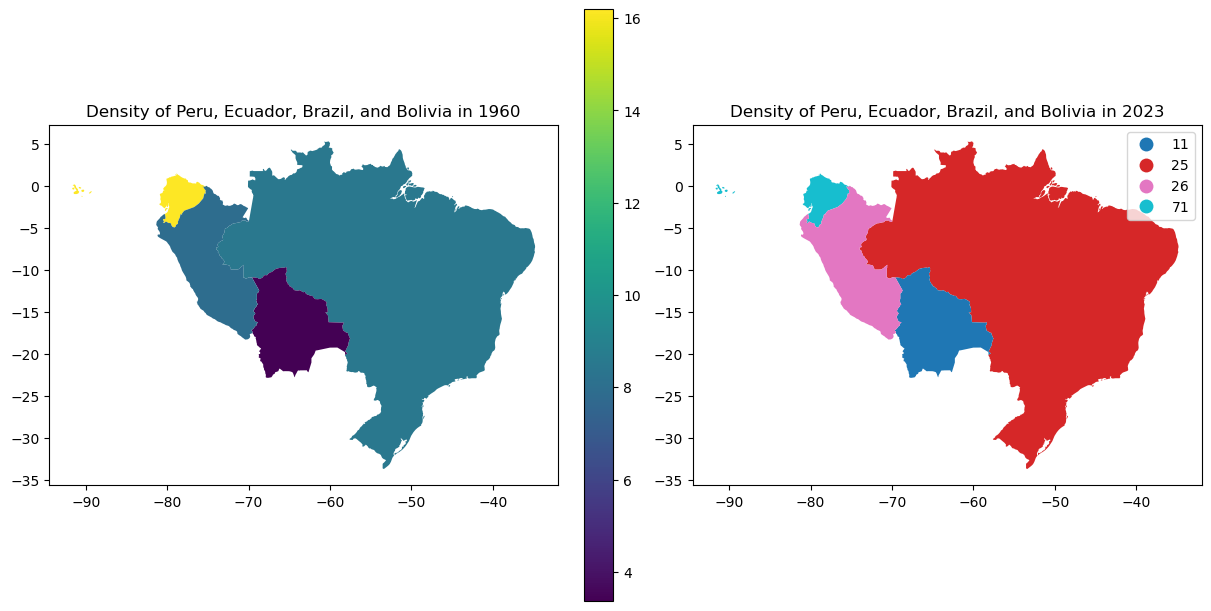

In [15]:
# Create graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6),constrained_layout=True)

# Population Density in 1960
merged_df_1960 = filtered_df.merge(filtered_southamerica1960, on="Country")
merged_df_1960.plot(column="Density (P/Km^2)",legend=True, ax=axes[0])
axes[0].set_title("Density of Peru, Ecuador, Brazil, and Bolivia in 1960")

# Population Density in 2023
merged_df = filtered_df.merge(population, on="Country")
merged_df.plot(column="Density\n(P/Km2)",legend=True,ax=axes[1])
axes[1].set_title("Density of Peru, Ecuador, Brazil, and Bolivia in 2023")

In [16]:
filtered_southamerica_Peru = southamericapast[southamericapast["Country"] == "Peru"]
filtered_southamerica_Brazil = southamericapast[southamericapast["Country"] == "Brazil"]
filtered_southamerica_Ecuador = southamericapast[southamericapast["Country"] == "Ecuador"]
filtered_southamerica_Bolivia = southamericapast[southamericapast["Country"] == "Bolivia"]

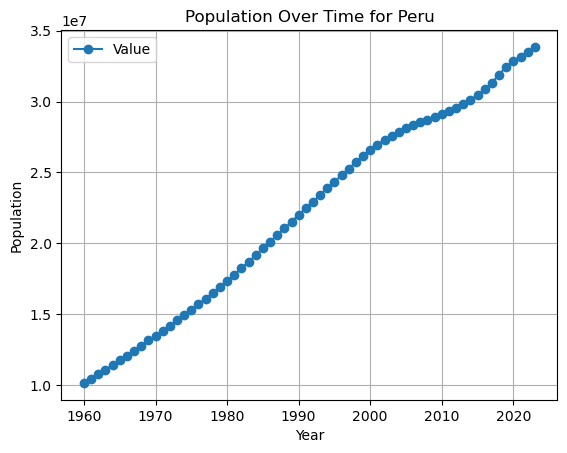

In [17]:
filtered_southamerica_Peru.plot(x='Year', y='Value', kind='line', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time for Peru')
plt.grid(True)

plt.show()

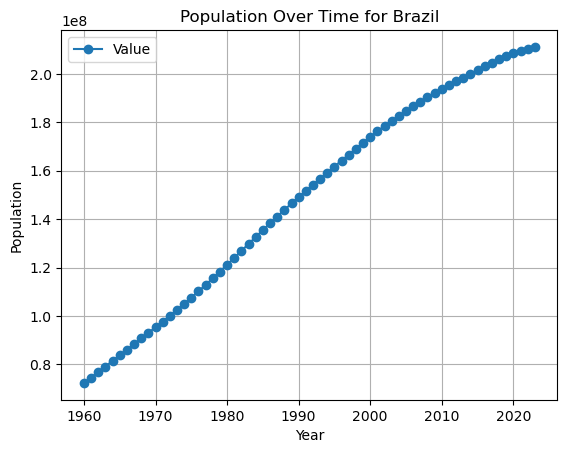

In [18]:
filtered_southamerica_Brazil.plot(x='Year', y='Value', kind='line', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time for Brazil')
plt.grid(True)

plt.show()

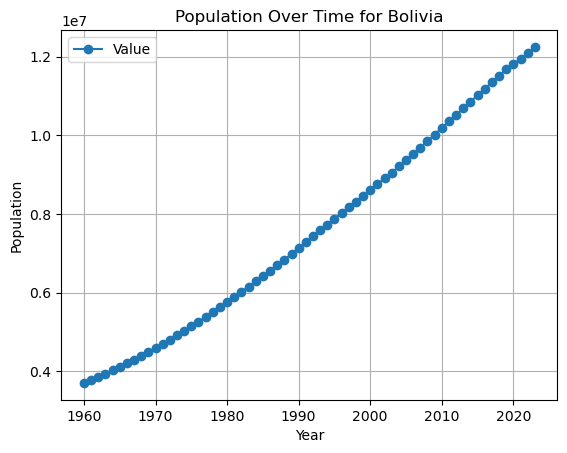

In [19]:
filtered_southamerica_Bolivia.plot(x='Year', y='Value', kind='line', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time for Bolivia')
plt.grid(True)

plt.show()

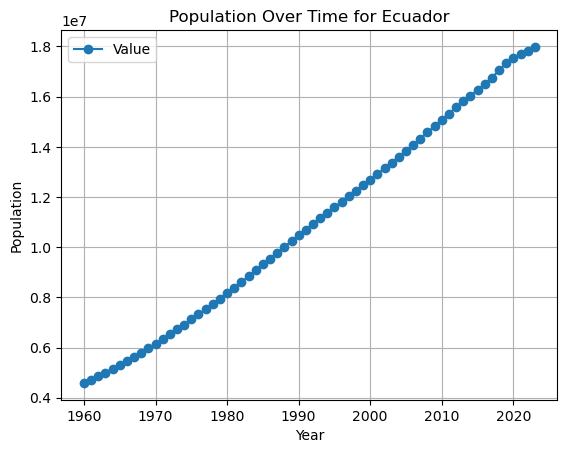

In [20]:
filtered_southamerica_Ecuador.plot(x='Year', y='Value', kind='line', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time for Ecuador')
plt.grid(True)

plt.show()

In [21]:
variable_labels = {"SP.POP.TOTL":"World Population"}

world = wbdata.get_dataframe(variable_labels, country="WLD",parse_dates=True)

# Print a few years' data
world.head()

,World Population
date,
2023-01-01,8.061876e+09
2022-01-01,7.989982e+09
2021-01-01,7.921184e+09
2020-01-01,7.856139e+09
2019-01-01,7.776892e+09


In [22]:
SP.RUR.TOTL        Rural population
SP.RUR.TOTL.ZG     Rural population growth (annual %)
SP.RUR.TOTL.ZS     Rural population (% of total population)
SP.URB.GROW        Urban population growth (annual %)
SP.URB.TOTL        Urban population
SP.URB.TOTL.IN.ZS  Urban population (% of total population)

SyntaxError: invalid syntax (1679483479.py, line 1)

In [23]:
variable_labels = {"SP.RUR.TOTL":"Rural Population"}

Brazil_rural_population = wbdata.get_dataframe(variable_labels, country="BRA",parse_dates=True)

# Print a few years' data
Brazil_rural_population

,Rural Population
date,
2023-01-01,25784506.0
2022-01-01,26172633.0
2021-01-01,26577264.0
2020-01-01,26973587.0
2019-01-01,27334331.0
...,...
1964-01-01,40696219.0
1963-01-01,40312012.0
1962-01-01,39893871.0


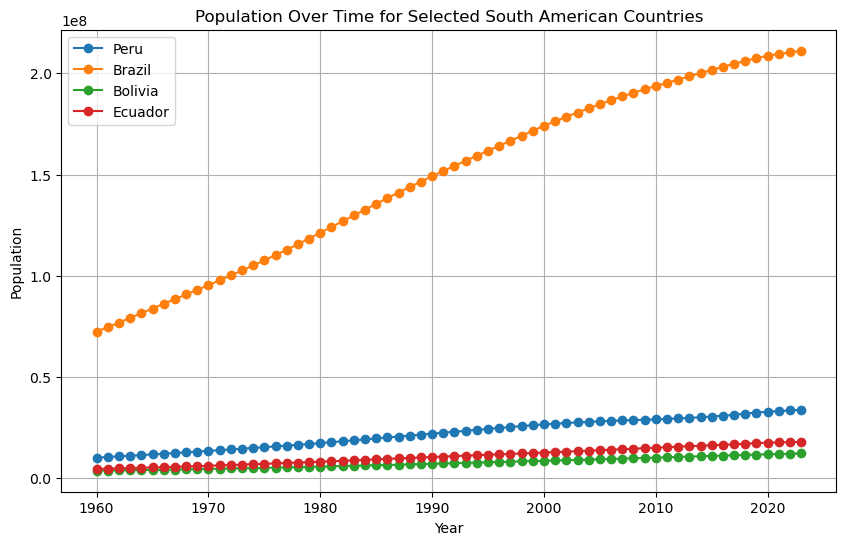

In [24]:
import matplotlib.pyplot as plt

# Ensure Year column is numeric for all dataframes
for df in [filtered_southamerica_Peru, filtered_southamerica_Brazil, 
           filtered_southamerica_Bolivia, filtered_southamerica_Ecuador]:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert Year column to numeric, coerce errors
    df.dropna(subset=['Year', 'Value'], inplace=True)  # Remove rows with NaN values

# Plot each country's population on the same figure
plt.figure(figsize=(10, 6))  # Set figure size

# Define dataset dictionary for cleaner plotting
datasets = {
    "Peru": filtered_southamerica_Peru,
    "Brazil": filtered_southamerica_Brazil,
    "Bolivia": filtered_southamerica_Bolivia,
    "Ecuador": filtered_southamerica_Ecuador
}

# Iterate over datasets and plot
for country, df in datasets.items():
    plt.plot(df['Year'], df['Value'], marker='o', linestyle='-', label=country)

# Add labels, title, and grid
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time for Selected South American Countries')
plt.grid(True)
plt.legend()  # Show legend to differentiate countries

# Display the plot
plt.show()

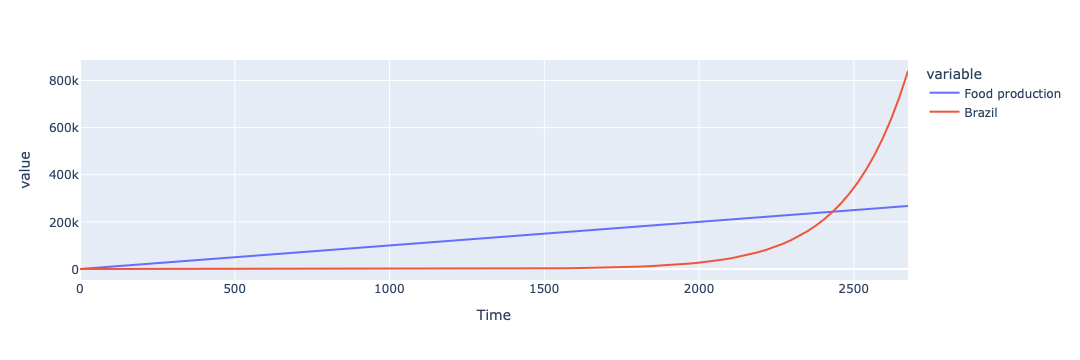

In [32]:
import numpy as np
import pandas as pd
from scipy.optimize import newton
import pandas as pd
pd.options.plotting.backend = 'plotly'

# Play with these constants
## for exponential
P0 = 1
r = 0.0051  # Rate of population growth

## for line
F0 = 10
m = 100

def food_production(t,m=m):
    return F0+m*t

def population(t,r=r):
    return P0*np.exp(r*t)

def choose_xaxis(r,m,x0=10):
    """
    Find a range of x so that curves intersect
    """
    tstar = -1
    try:
        while tstar <= 0:
            tstar = newton(lambda t: food_production(t,m) - population(t,r),x0,maxiter=1000)
            x0 = x0*10
        return np.linspace(0,tstar*1.1,100)
    except RuntimeError: # Failed to find root
        return np.linspace(0,1000,100)

T = choose_xaxis(r,m)

df = pd.DataFrame({'Time': T,
                   'Food production':[food_production(t) for t in T],
                   'Brazil':[population(t) for t in T]}).set_index('Time')
df.plot()